<a href="https://colab.research.google.com/github/khagerthey/VIS1/blob/main/PS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

also 2 negative numbers on 
CAPPER TO DUD DETECTOR
LABELER TO TRAYMAKER

much of it organized by rows like day1,day2,...day7
would be interesting to have like data by months: each row a month, jan, feb, mar, etc and or by year--again the more data the better

each day different number of glasses, rt?
so can also express breakage as percents! same where you have months

could use sankey vis, but especially if a source has multiple targets and or target has multiple sources

but also there are these like engineering graphs
eg:
https://www.google.com/search?q=matplotlib+machine+flow&tbm=isch&ved=2ahUKEwjMzJ-76ZP-AhWgE1kFHdT7ADMQ2-cCegQIABAA&oq=matplotlib+machine+flow&gs_lcp=CgNpbWcQAzoECCMQJzoHCAAQGBCABDoFCAAQgARQoQpYyBxg_x1oAHAAeAGAAbUBiAGlCpIBBDEyLjOYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=wPotZMzsDqCn5NoP1PeDmAM&bih=842&biw=1707&rlz=1CAKDZI_enUS997US997

so copuld have like a diagram explaining what is happening like depalletizer here and there filler etc


in general it is good, but would be useful to have more data; if cant get more from your organization, could clook for public data and other related datasets, let me know if you need help

some quick finds:

https://www.kaggle.com/datasets/uciml/glass

https://www.kaggle.com/datasets/prashant111/glass-identification-dataset

https://datahub.io/machine-learning/glass

http://odds.cs.stonybrook.edu/glass-data/

https://towardsdatascience.com/part-i-analyzing-the-glass-dataset-c556788a496f

In [1]:

import time, os, sys, re
import zipfile, json, datetime, string 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib                                                 

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() 

%matplotlib inline
%matplotlib 
#%matplotlib --list 
#interactive plots:
%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
%matplotlib nbagg

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
plt.style.available #list available styles :) may install more
plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Using matplotlib backend: <object object at 0x7f8c9558bc10>


#**Hypothesis:** 
Line 3 is experiencing high amounts of glass breakage due to thermal shock. Thermal shock would be a result of hot product being poured into cold/room temperature glass bottles. This would be seen at the filler section of the line and in the glass evauation as stress cracks.


This food production company is currently investigating a high amount of glass breakages on their highest performing production line (3). Data recieved from said company is confidential, I am not premitted to link or post directly from source. All private information (including company name) has been removed.



#Investigating Loss

##Coding work

In [13]:
Loss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20LOSS%20(1).csv')
Loss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,FEBUARY 27,2,394,369,4538,180
1,FEBUARY 28,739,6,19,-7070,5032
2,March 1,79,2430,4013,-5693,2720
3,March 2,892,1897,28512,-29711,253
4,March 6,78,2000,1044,-2510,553
5,March 7,37,1735,4127,-5728,400
6,March 8,124,1,-11,86,-84


In [14]:
print(Loss.sum()) 

DAY                        FEBUARY 27FEBUARY 28March 1March 2March 6March...
DEPALLETIZER TO FILLER                                                  1951
FILLER TO CAPPER                                                        8463
CAPPER TO DUD DETECTOR                                                 38073
DUD DETECTOR TO LABELER                                               -46088
LABELER TO TRAYMAKER                                                    9054
dtype: object


Why are there negatives at the dud detector to the labeler? Negatives imply a gain in glass. Must be further investigated. 

In [15]:
#Loss.dropna(axis = 0, how = 'all', inplace = True)
#Loss = Loss.rename(columns={'Unnamed: 0':'Location'})
#Loss

In [16]:
#Loss_transposed=Loss.T
#Loss.T
#Loss.T.dropna(axis = 0, how = 'all')

In [17]:
Start=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20START%20(1).csv')
Start.dropna(axis = 0, how = 'all')
#Start = Start.rename(columns={'Unnamed: 0':'Location'})
#NaN is okay, data not expected to be there
Start

,DAY,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER
0,FEBUARY 27,39167,39165,38771,38402,33864,33684
1,FEBUARY 28,1990,1251,1245,1226,8296,3264
2,March 1,140529,140450,138020,134007,139700,136980
3,March 2,113923,113031,111134,82622,112333,112080
4,March 6,120721,120643,118643,117599,120109,119556
5,March 7,120079,120042,118307,114180,119908,119508
6,March 8,200,76,75,86,0,84


In [18]:
print(Start.sum())

DAY              FEBUARY 27FEBUARY 28March 1March 2March 6March...
DEPALLETIZER                                                536609
FILLER                                                      534658
CAPPER                                                      526195
DUD DETECTOR                                                488122
LABELER                                                     534210
TRAYMAKER                                                   525156
dtype: object


In [19]:

#Start_transposed=Start.T
#Start.T
#Start.T.dropna(axis = 0, how = 'all')

In [20]:
Totalloss = pd.merge(Loss, Start, how='outer', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,FEBUARY 27,2,394,369,4538,180,39167,39165,38771,38402,33864,33684,both
1,FEBUARY 28,739,6,19,-7070,5032,1990,1251,1245,1226,8296,3264,both
2,March 1,79,2430,4013,-5693,2720,140529,140450,138020,134007,139700,136980,both
3,March 2,892,1897,28512,-29711,253,113923,113031,111134,82622,112333,112080,both
4,March 6,78,2000,1044,-2510,553,120721,120643,118643,117599,120109,119556,both
5,March 7,37,1735,4127,-5728,400,120079,120042,118307,114180,119908,119508,both
6,March 8,124,1,-11,86,-84,200,76,75,86,0,84,both


In [21]:
Totalloss.there.value_counts(sort=False)
#Okay, same data from before not expected to merge

left_only     0
right_only    0
both          7
Name: there, dtype: int64

In [22]:
Totalloss = pd.merge(Loss, Start, how='inner', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,FEBUARY 27,2,394,369,4538,180,39167,39165,38771,38402,33864,33684,both
1,FEBUARY 28,739,6,19,-7070,5032,1990,1251,1245,1226,8296,3264,both
2,March 1,79,2430,4013,-5693,2720,140529,140450,138020,134007,139700,136980,both
3,March 2,892,1897,28512,-29711,253,113923,113031,111134,82622,112333,112080,both
4,March 6,78,2000,1044,-2510,553,120721,120643,118643,117599,120109,119556,both
5,March 7,37,1735,4127,-5728,400,120079,120042,118307,114180,119908,119508,both
6,March 8,124,1,-11,86,-84,200,76,75,86,0,84,both


In [23]:
TL = Totalloss[['DAY', 'DEPALLETIZER ', 'DEPALLETIZER TO FILLER', 'FILLER ', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER ', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]


TL


#columns reordered for clearer comparision
#Gradient applied to make large loss more visable


,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,FEBUARY 27,39167,2,39165,394,38771,369,38402,4538,33864,180,33684
1,FEBUARY 28,1990,739,1251,6,1245,19,1226,-7070,8296,5032,3264
2,March 1,140529,79,140450,2430,138020,4013,134007,-5693,139700,2720,136980
3,March 2,113923,892,113031,1897,111134,28512,82622,-29711,112333,253,112080
4,March 6,120721,78,120643,2000,118643,1044,117599,-2510,120109,553,119556
5,March 7,120079,37,120042,1735,118307,4127,114180,-5728,119908,400,119508
6,March 8,200,124,76,1,75,-11,86,86,0,-84,84


##Loss Results

In [ ]:
TL.style.set_precision(0).background_gradient(cmap='Greens') #aok cleaner without decimal points

<ipython-input-23-90c721db15e5>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  TL.style.set_precision(0).background_gradient(cmap='Greens') #aok cleaner without decimal points


,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,FEBUARY 27,39167,2,39165,394,38771,369,38402,4538,33864,180,33684
1,FEBUARY 28,1990,739,1251,6,1245,19,1226,-7070,8296,5032,3264
2,March 1,140529,79,140450,2430,138020,4013,134007,-5693,139700,2720,136980
3,March 2,113923,892,113031,1897,111134,28512,82622,-29711,112333,253,112080
4,March 6,120721,78,120643,2000,118643,1044,117599,-2510,120109,553,119556
5,March 7,120079,37,120042,1735,118307,4127,114180,-5728,119908,400,119508
6,March 8,200,124,76,1,75,-11,86,86,0,-84,84


The dud detector works to kick out bottles that are defective. This location is expected to have a large amount of missing bottles.
The filler area to capper is the area of concern.

**THIS HAS NEGATIVES, A FLAW IN DATA, NOT RELIABLE!**

##More Investigating

The negative amounts lead for inaccurate results either due to use error or the machine miscounting. The production line was monitored to see if glass was being added back incorrectly after the filler, it was not. The processing paperwork was found to have forged checks and accurate information though. This means that there is likely a percentage of breakages due to human error.

In [51]:
NewStart=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20NEW%20START%20(2).csv')
NewStart

,DAY,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER
0,March 16,14728,14710,12951,7913,7857,7127
1,March 20,18464,18400,15858,7359,6975,6322
2,March 21,37347,37328,36375,29665,29471,29368
3,March 22,37452,37428,36437,34321,34068,33736
4,March 23,100423,100117,97264,91731,91617,90858
5,March 27,75997,75709,73937,70185,70096,69362
6,March 28,25476,25384,25302,17868,17762,17640
7,March 29,122140,122078,121863,112672,102387,91918
8,April 3,136292,136242,136162,126619,125726,124902
9,April 4,135137,135081,134894,133917,132813,130112


In [30]:
print(NewStart.sum())

DAY              March 16March 20March 21March 22March 23March ...
DEPALLETIZER                                                309887
FILLER                                                      474676
CAPPER                                                      298124
DUD DETECTOR                                                296814
LABELER                                                     257732
TRAYMAKER                                                   254299
dtype: object


In [52]:
NewLoss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20NEW%20LOSS%20(3).csv')
NewLoss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,SUM
0,March 16,18,1759,5038,56,730,7601
1,March 20,64,2542,8499,384,653,12142
2,March 21,19,953,6710,194,103,7979
3,March 22,24,991,2116,253,332,3716
4,March 23,306,2853,5533,114,759,9565
5,March 27,288,1772,3752,89,734,6635
6,March 28,92,82,7434,106,122,7836
7,March 29,62,215,9191,10285,10469,30222
8,April 3,50,80,9543,893,824,11390
9,April 4,56,187,977,1104,2701,5025


In [27]:
print(NewLoss.sum())

DAY                        March 16March 20March 21March 22March 23March ...
DEPALLETIZER TO FILLER                                                   811
FILLER TO CAPPER                                                       10952
CAPPER TO DUD DETECTOR                                                  1196
DUD DETECTOR TO LABELER                                                39082
LABELER TO TRAYMAKER                                                    3433
dtype: object


In [28]:
#NewLoss[:20].style.background_gradient(cmap='Purples')

The recalibrated data now shows the high breakage areas as filler to capper, dud detector to labeler, and labeler to traymaker.

In [53]:
NewTotalloss = pd.merge(NewLoss, NewStart, how='outer', on=['DAY'], indicator='true')
NewTotalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,SUM,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,true
0,March 16,18,1759,5038,56,730,7601,14728,14710,12951,7913,7857,7127,both
1,March 20,64,2542,8499,384,653,12142,18464,18400,15858,7359,6975,6322,both
2,March 21,19,953,6710,194,103,7979,37347,37328,36375,29665,29471,29368,both
3,March 22,24,991,2116,253,332,3716,37452,37428,36437,34321,34068,33736,both
4,March 23,306,2853,5533,114,759,9565,100423,100117,97264,91731,91617,90858,both
5,March 27,288,1772,3752,89,734,6635,75997,75709,73937,70185,70096,69362,both
6,March 28,92,82,7434,106,122,7836,25476,25384,25302,17868,17762,17640,both
7,March 29,62,215,9191,10285,10469,30222,122140,122078,121863,112672,102387,91918,both
8,April 3,50,80,9543,893,824,11390,136292,136242,136162,126619,125726,124902,both
9,April 4,56,187,977,1104,2701,5025,135137,135081,134894,133917,132813,130112,both


In [49]:
NewTotalloss.true.value_counts(sort=False)

left_only      0
right_only     0
both          14
Name: true, dtype: int64

In [54]:
NTL = NewTotalloss[['DAY', 'DEPALLETIZER ', 'DEPALLETIZER TO FILLER', 'FILLER ', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER ', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]

NTL
#Total counts for a month

,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,March 16,14728,18,14710,1759,12951,5038,7913,56,7857,730,7127
1,March 20,18464,64,18400,2542,15858,8499,7359,384,6975,653,6322
2,March 21,37347,19,37328,953,36375,6710,29665,194,29471,103,29368
3,March 22,37452,24,37428,991,36437,2116,34321,253,34068,332,33736
4,March 23,100423,306,100117,2853,97264,5533,91731,114,91617,759,90858
5,March 27,75997,288,75709,1772,73937,3752,70185,89,70096,734,69362
6,March 28,25476,92,25384,82,25302,7434,17868,106,17762,122,17640
7,March 29,122140,62,122078,215,121863,9191,112672,10285,102387,10469,91918
8,April 3,136292,50,136242,80,136162,9543,126619,893,125726,824,124902
9,April 4,135137,56,135081,187,134894,977,133917,1104,132813,2701,130112


In [56]:
Percentages=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20PERCENTAGES%20(1).csv')
Percentages
#Percentage of breakages recorded in each area for the day

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,March 16,0.24%,23.14%,66.28%,0.74%,9.60%
1,March 20,0.53%,20.94%,70.00%,3.16%,5.38%
2,March 21,0.24%,11.94%,84.10%,2.43%,1.29%
3,March 22,0.65%,26.67%,56.94%,6.81%,8.93%
4,March 23,3.20%,29.83%,57.85%,1.19%,7.94%
5,March 27,4.34%,26.71%,56.55%,1.34%,11.06%
6,March 28,1.17%,1.05%,94.87%,1.35%,1.56%
7,March 29,0.21%,0.71%,30.41%,34.03%,34.64%
8,April 3,0.44%,0.70%,83.78%,7.84%,7.23%
9,April 4,1.11%,3.72%,19.44%,21.97%,53.75%


**I DON'T THINK BELOW IS NEEDED**

Displayed here shows a high amount of breakages from the labeler to traymaker. This area was found to have missing and forged palletizer checks on processing paperwork, leading to the belief that the breakages here are a result of human error.

**TRY SANKEY BELOW**

#Training

As displayed earlier, there is a large amount of incorrect paper work performed by the palletizer which may have been resulting in more breakages from the labeler to the traymaker.

In [ ]:
#NewLoss1 = NewLoss.drop(columns=['FILLER TO CAPPER', 'DEPALLETIZER TO FILLER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR TO LABELER' ])
#NewLoss1
#Sum of breakages likely due to human error
NewLoss=NewLoss['LABELER TO TRAYMAKER']
NewLoss
#aok or could just keep one col
#https://www.google.com/search?client=firefox-b-1-d&q=pandas+keep+one+column

0    730
1    653
2    103
3    332
4    759
5    734
6    122
Name: LABELER TO TRAYMAKER, dtype: int64

In [ ]:
print(NewLoss.sum())

3433


While the labeler to traymaker is not the highest point of breakage (only 6%), it would be beneficial to having training to reduce the amount here. Palletizers are the only people who physically handle the finished goods. While the filler area could also be from other factors such as thermal shock, more training would not hurt to ensure less breakage due to human error. It would also confirm if the breakages are due to something more drastic.

#Breakage Analysis



Data provided by company glass supplier and limited for privacy. Salvaged broken glass are used for analysis. 

In [ ]:
breakage=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/breakage.xlsx%20-%20Sheet2.csv')
breakage = breakage.rename(columns={'Months 2022':'MONTHS 2022'})
breakage.sort_values('MONTHS 2022',inplace=True) #aok more intuitive
breakage
#there are 4 types of glass breakages
#renamed for the sake of merge

,MONTHS 2022,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage
11,1,209,168,7,199
10,2,276,118,3,115
9,3,557,216,11,134
8,4,499,82,6,160
7,5,272,175,3,102
6,6,450,141,1,132
5,7,193,183,0,95
4,8,652,60,5,178
3,9,937,207,13,103
2,10,504,66,18,62


Text(0.5, 1.0, 'Cause of Breakage')

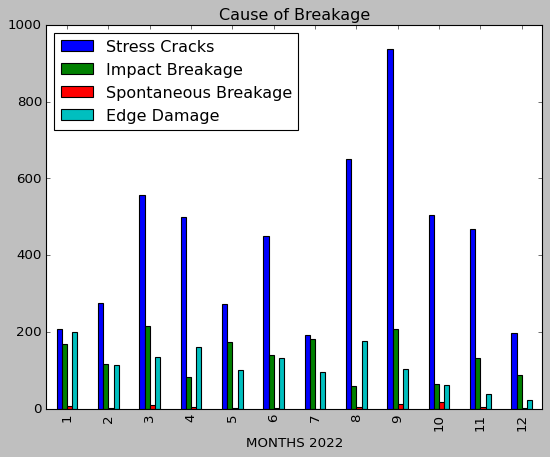

In [ ]:
breakage.plot(x='MONTHS 2022', y=['Stress Cracks','Impact Breakage','Spontaneous Breakage','Edge Damage'], kind='bar')
#breakage.plot.bar(figsize = (13,10))
plt.title('Cause of Breakage')
#the different breakages recorded throughout 2022

The primary cause of breakage has been stress cracks which are the result of thermal shock.

The amount of stress cracks throughout the year vary in volume, this could be due to product demand and amount of production. Determining the cause of outlyers requires more investigation. 

#Glass POs

In [ ]:
CHGlass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/TOTAL%20SUM.csv')
CHGlass
#POs are product orders, below is the total amount of material ordered and recieved for each month

,MONTHS,TOTAL POS
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [ ]:
CHGlass = CHGlass.rename(columns={'TOTAL POS':'TOTAL PRODUCT RECEIVED'})
CHGlass = CHGlass.rename(columns={'MONTHS':'MONTHS 2022'})
CHGlass
#New header gives better descriptions

,MONTHS 2022,TOTAL PRODUCT RECEIVED
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [ ]:
print(CHGlass.sum())

MONTHS 2022                    78
TOTAL PRODUCT RECEIVED    8554922
dtype: int64


This are the total sum of glass ordered each month in 2022 with a grand total of 8554922 for the year. This is only glass used on line 3 which will be our main focus towards glass breakages.
This data was retrieved from our inventroy database via Windows SL.

In [ ]:
mergedbreakage = pd.merge(CHGlass, breakage, how='inner', on=['MONTHS 2022'], indicator='both')
mergedbreakage

,MONTHS 2022,TOTAL PRODUCT RECEIVED,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage,both
0,12,324896,198,87,1,23,both
1,11,766480,469,132,4,39,both
2,10,793936,504,66,18,62,both
3,9,1267552,937,207,13,103,both
4,8,940368,652,60,5,178,both
5,7,336336,193,183,0,95,both
6,6,761934,450,141,1,132,both
7,5,441644,272,175,3,102,both
8,4,940368,499,82,6,160,both
9,3,1063920,557,216,11,134,both


In [ ]:
mergedbreakage["TOTAL PRODUCT RECEIVED"] /=1000
mergedbreakage['TOTAL PRODUCT RECEIVED'] = mergedbreakage['TOTAL PRODUCT RECEIVED'].astype(float).round(1)
mergedbreakage

,MONTHS 2022,TOTAL PRODUCT RECEIVED,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage,both
0,12,324.9,198,87,1,23,both
1,11,766.5,469,132,4,39,both
2,10,793.9,504,66,18,62,both
3,9,1267.6,937,207,13,103,both
4,8,940.4,652,60,5,178,both
5,7,336.3,193,183,0,95,both
6,6,761.9,450,141,1,132,both
7,5,441.6,272,175,3,102,both
8,4,940.4,499,82,6,160,both
9,3,1063.9,557,216,11,134,both


Text(0.5, 1.0, 'Amount vs. Break')

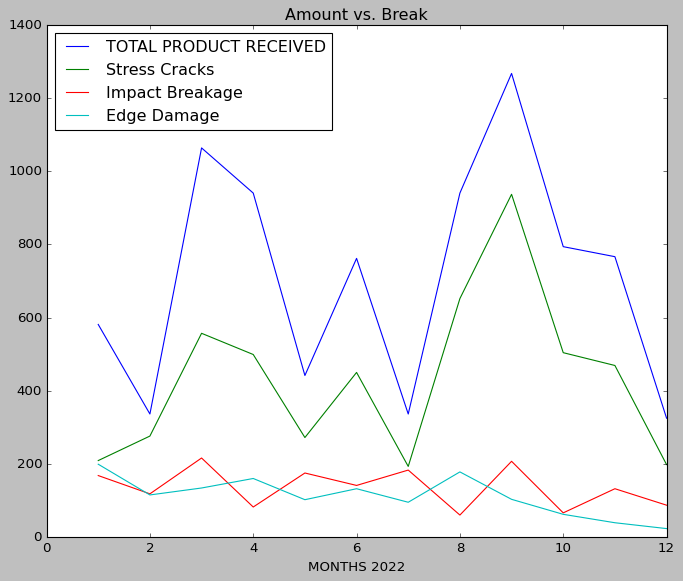

In [ ]:
mergedbreakage.plot(x='MONTHS 2022', y=['TOTAL PRODUCT RECEIVED','Stress Cracks','Impact Breakage','Edge Damage'], kind='line', figsize=(10,8))
plt.title('Amount vs. Break')
#purpose of graph to show correlation of po to breakage
#TOTAL PRODUCT RECEIVED is shown in thousands

aok; ok this is best graph so far, we get here at 2 things over time relationships and comparisons across vars

over time see fluctions with increases around 3 and 9--quite uneven, perhaps one recomendation could be to be more even if possible in production over year

relationships across vars, this is important:

stress cracks in general follow total; but interesting: totally not in 1, not as much in 3

impact breakage pretty much unrelated! isnt that unexpected? huge variablilty in total, but impact brekage quite flat

edge damage: decrease over months regardless of total! also seems unexpected!
i'd talk about this with folks at your organization

#Price/Profit Loss?

Price percentage increase throughout the years via NasDaq: https://data.nasdaq.com/data/FRED/PCU32723272-producer-price-index-by-industry-glass-and-glass-product-manufacturing

In [ ]:
glass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20price%20%25%20-%20Cleaned%20(2).csv')
glass['Glass Price Index %'] = glass['Glass Price Index %'].astype(float).round(3)
glass
#rounded to read easier

,Date,Glass Price Index %
0,2021,0.099
1,2020,0.026
2,2019,0.015
3,2018,0.032
4,2017,0.022
5,2016,0.021
6,2015,0.045
7,2014,0.017
8,2013,0.013
9,2012,0.016


This is the glass price index to give an idea of how prices have fluctuated.
Purpose of the price index is to show that glass is getting more expensive. The company recorded 8,265 broken bottles in 2022.

#Possible Option


In the case that the breakages after the filler are due to thermal shock, Borosilicate is a great glass alternative to Type 3 Soda-lime.
Below is a table sourced from Kopp Glass. https://www.koppglass.com/blog/3-common-glass-types-properties-and-applications

In [ ]:
glasstypes=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20Types%20-%20Sheet1.csv')
glasstypes


,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers


This table shows and compares each type of glass. Borosilicate has a srtonger thermal shock resistance, making it a good solution to explore.


In [ ]:
glasscompounds=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20compounds%20-%20Sheet4%20(1).csv')
glasscompounds = glasscompounds.rename(columns={'Compound':'Glass Type'})
glasscompounds['Glass Type'].replace({'Borosilicate Glass – % content':'Borosilicate'})
glasscompounds
#'Compound' header has been changed to 'Glass Type' to merge

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate Glass – % content,80.6,13,4,2.4
1,Soda Lime Glass – % content,69.0,1,13,4.0


Table sourced from CamLab. https://camblab.info/borosilicate-glass-vs-soda-lime-glass-vs-pyrex-what-is-the-difference/

This table shows the chemical make-up of the glass to explain what makes them different.


In [ ]:
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Borosilicate Glass – % content'], 'Borosilicate')
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Soda Lime Glass – % content'], 'Soda-lime silicate')
#Material names changed to merge with first table
glasscompounds

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate,80.6,13,4,2.4
1,Soda-lime silicate,69.0,1,13,4.0


In [ ]:
names = list(glasscompounds.columns)[1:]
names
values=glasscompounds[glasscompounds['Glass Type']=='Borosilicate'].values.flatten().tolist()[1:]
values

[80.6, 13, 4, 2.4]

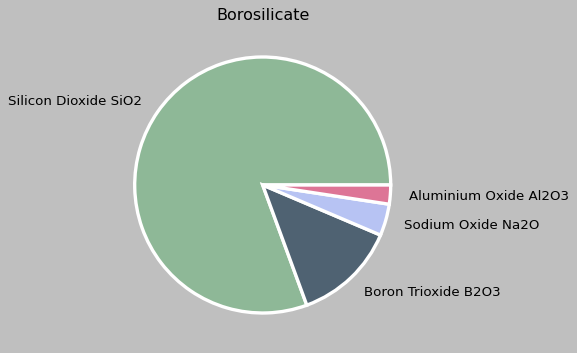

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
#names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
#values=[80.6,13,4,2.4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Borosilicate')
plt.show();

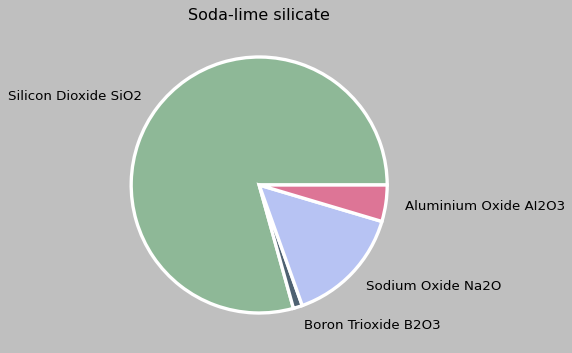

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
values=[69,1,13,4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Soda-lime silicate')
plt.show();

These pie charts show the clear difference in chemical composition between the two materials. Boron Trioxide B2O3 stands out the most as Borosilicate contains more, which contributes to it's high thermal shock resistance.

In [ ]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='outer', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13.0,4.0,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1.0,13.0,4.0,both
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers,NaN,NaN,NaN,NaN,left_only


In [ ]:
mergedglass.present.value_counts(sort=False)
#expected not to merge on Phosphates, as there was no data given on the second table

left_only     1
right_only    0
both          2
Name: present, dtype: int64

In [ ]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='inner', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13,4,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1,13,4.0,both


Borosilicate is a great alternative to Soda-lime. With it's high chemical resistence, it makes products taste better because it does not leach out. Borosilicate is more expensive than Soda-lime, but may be a cheaper solution than expanding the company's current glass heating storage.